# Recipe Site Traffic Prediction
This project is part of a practical data science challenge to help Tasty Bytes, a recipe and meal planning platform, optimize homepage content by predicting which recipes will drive high user traffic. The goal is to recommend popular recipes for the homepage based on nutritional and categorical features of each recipe.
# # Methodology
1.	Data Validation & Cleaning
2.	Exploratory Data Analysis (EDA)
3.	Feature Engineering
4.	Model Development
5.	Model Evaluation
6.	Recommendation & Deployment Strategy


## Data Validation   
 - recipe: 947 unique values, no missing values, numeric (int64), matches the description. No    cleaning needed.
 - calories: 891 unique values, 52 missing values, numeric (float64). Cleaning missing values    is needed.
 - Carbohydrate : 52 missing values, numeric (float64).Because we do not      know the weight    of the serving, we cannot confirm if     these are in grams, but we assume    they are in    grams. Cleaning missing values is needed.
 - Sugar : 52 missing values, numeric (float64). . Because we do not know the weight of          the serving, we cannot confirm if these are in grams, but we assume they are    in grams.    Cleaning missing values is needed
 - Protein : 52 missing values, numeric (float64). Because we do not know    the weight of      the serving, we cannot confirm if these are in grams, but we assume they are    in            grams.Cleaning missing values is needed.
 - category: 11 unique values values should be 10,no missing values,categorical(object      )    ,need cleaning, change    "Chicken Breast" to "Chicken," the values will be 10.
 - servings: 6 unique values should be 4, no missing values, but stored as an object(string).    Needs  conversion to remove string "as a snack" from values then convert to number.
 - high_traffic: Only 1 unique value ("High"), 373 missing values. Needs further inspection—    likely a binary column where missing values imply "Low" traffic and trim spaces.
 - removing duplicate, ouliners, and missing values after treated dataset.

## Exploratory Analysis:  
  - Included (Bar Chart and Histogram) two different graphics showing single variables.
  - Includeed (Heatmap) one graphic showing two variables to represent the relationship           between features.
  - Describe your findings
    - From the bar chart, it is evident that recipes categorized as "High Traffic" have            significantly higher traffic values compared to those in the "Other" category. The total      number of high-traffic recipes exceeds that of other categories.
    - The histograms reveal that all recipes, regardless of their traffic category, share          similar distributions for calories, carbohydrates, sugar, and protein content. However,      there are noticeable differences in the distribution of recipe categories between the       "High Traffic" and "Other" groups.
    - The analysis reveals distinct category preferences between high-traffic and other            recipes. In high-traffic recipes, Potato, Beverages, and Pork are the most popular,          while Chicken, Dessert, and Vegetables receive less engagement. Conversely, in the            "Other" category, Breakfast, Beverages, and Chicken dominate, whereas Potato,                Vegetables, and Meat show minimal representation. Beverages are consistently popular in      both groups, but Breakfast stands out as a key driver in lower-traffic recipes.              Meanwhile, Potato and Pork attract significant engagement in high-traffic recipes but        are far less favored in the "Other" category. These insights highlight how different          food categories appeal to varying audience segments, helping to tailor content for            optimal engagement.
    - The heatmap illustrates the correlation between various attributes, confirming several key observations. Notably, there is a moderate positive correlation (0.56) between "category" and "high_traffic," suggesting that certain recipe categories are more likely to attract high traffic. The heatmap also shows the correlation between "high_traffic" and various nutritional attributes. There is a weak correlation between "high_traffic" and nutritional components such as calories (0.07), carbohydrates (0.07), sugar (-0.09), and protein (-0.06). These low correlation values indicate that the nutritional content of recipes does not significantly influence their traffic levels.

## Model Development
  - The problem is a supervised binary classification task . The goal is to predict whether a recipe      will lead to high traffic or not based on the provided features (calories, carbohydrate, sugar, protein, category, etc.). This prediction will help the product team decide which recipes to display on the homepage to maximize traffic and subscriptions.

  - Reason for Model Selection
    - Logistic Regression :
Logistic regression is a good baseline model for binary classification tasks due to its simplicity, interpretability, and ability to handle linear relationships between features and the target variable.
It provides a strong starting point for comparison with more complex models.
    - Decision Tree Classifier :
Decision trees are non-parametric models that can capture non-linear relationships in the data. They are also interpretable, making them useful for understanding feature importance.
However, decision trees are prone to overfitting, so tuning parameters like max_depth is essential.
    - Support Vector Classifier (SVC) :
SVC is effective for binary classification problems and can handle both linear and non-linear relationships using kernel functions.
It is computationally efficient for smaller datasets but may require tuning of hyperparameters like C for optimal performance.
  - Code to fit the baseline and comparison models
    - all the codes are in the same file down with titles.
## Model Evaluation
  - Performance Metrics
We evaluated the models using the following metrics:
    - Accuracy : Proportion of correctly classified instances.
    - Precision : Proportion of true positives among predicted positives.
    - Recall : Proportion of true positives among actual positives.
    - F1 Score : Harmonic mean of precision and recall.
    - ROC AUC Score : Measures the ability of the model to distinguish between classes.
   

 - Logistic Regression outperformed all other models, achieving the highest accuracy (0.822), precision (0.856), recall (0.856), F1 score (0.856), and ROC AUC score (0.862). While the Decision Tree model showed the same performance notable improvement after hyperparameter tuning, it still fell short of Logistic Regression, particularly in ROC AUC score 0.86 to 0.81. The Support Vector Classifier, despite some tuning, delivered good performance but did not surpass Logistic Regression in any key metric, highlighting Logistic Regression's overall superiority in this analysis.

## Business Metrics
  - Metric Definition
To align with the business goal of predicting popular recipes 80% of the time while minimizing unpopular recommendations, we propose the following metric:

    - Weighted Accuracy : A custom metric that weights recall higher than precision to prioritize identifying popular recipes (high_traffic = "High"). The formula is:
Weighted Accuracy=0.7×Recall+0.3×Precision
  - Model Performance Using Business Metric
Using the weighted accuracy metric:
    - Logistic Regression: 0.7×0.856+0.3×0.856=0.856
    - Decision Tree: 0.7×0.856+0.3×0.856=0.856
    - Support Vector Classifier: 0.7×0.868+0.3×0.829=0.857
  - While the tuned Support Vector Classifier slightly outperforms logistic regression in this metric, logistic regression remains the most balanced and interpretable choice.


## Final summary including recommendations that the business should undertake
- Visualizations revealed significant differences in recipe categories between high-traffic and other recipes.
- High-traffic recipes favored categories like Potato , Beverages , and Pork , while lower-traffic recipes leaned toward Breakfast , Chicken , and Dessert .
- Nutritional attributes (calories, carbohydrates, sugar, protein) showed weak correlations with traffic levels, indicating that these factors alone are not strong predictors of popularity.

- Recommandations
    - Deploy Logistic Regression Model :
Given its superior performance, interpretability, and alignment with business goals, the tuned Logistic Regression model should be deployed to predict high-traffic recipes.
This model will help the product team identify and display recipes that are likely to drive higher traffic and subscriptions.
    - Monitor Weighted Accuracy :
Use the Weighted Accuracy metric to evaluate model performance in production.
Set a minimum threshold of 0.8 to ensure the model meets the business requirement of correctly predicting popular recipes 80% of the time.
    - Leverage Recipe Categories :
Focus on promoting recipes from categories identified as high-traffic drivers: Potato , Beverages , and Pork .
Avoid over-representing less popular categories like Chicken , Dessert , and Vegetables unless they align with specific customer preferences or seasonal trends.
    - Feature Engineering :
Explore additional features such as seasonality , user demographics , and recipe metadata (e.g., keywords, tags) to further improve model performance.
Incorporate feedback loops to capture user interactions (e.g., clicks, shares) and refine predictions over time.
    - Iterative Improvement :
Continuously monitor model performance and retrain periodically with new data to adapt to changing user preferences.
Conduct A/B testing to validate the impact of recommended recipes on website traffic and subscription rates.
    - Enhance Data Collection :
Address gaps in the current dataset, particularly missing nutritional values and ambiguous categorization.
Standardize data collection processes to ensure consistency and completeness for future analyses.

# Start of project Code

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import PowerTransformer
# Import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

plt.style.use('ggplot')


# Data Validation

In [ ]:
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [ ]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [ ]:
# Define the columns from your dataset
columns = ['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']

# Count the number of unique values in each column
unique_counts = [df[col].nunique() for col in columns]

# Print the results
print(" | ".join(f"{col}: {count}" for col, count in zip(columns, unique_counts)))


recipe: 947 | calories: 891 | carbohydrate: 835 | sugar: 666 | protein: 772 | category: 11 | servings: 6 | high_traffic: 1


In [ ]:
print('\033[91mvalidate category:\033[0m')
print(df['category'].value_counts(dropna=False))
print('\033[91mvalidate servings:\033[0m')
print(df['servings'].value_counts(dropna=False))
print('\033[91mvalidate high_traffic:\033[0m')
print(df['high_traffic'].value_counts(dropna=False))

validate category:
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64
validate servings:
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64
validate high_traffic:
High    574
NaN     373
Name: high_traffic, dtype: int64


In [ ]:
#validate any negative values in numeric variables
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


### Missing values

In [ ]:
# function to count missing data and in which feature.
def missing_data(data):
    nb_values = data.isnull().sum().sort_values(ascending = False) #contains the number of values missing
    percent_values = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False) #contains the percentage of values missing
    return pd.concat([nb_values, percent_values], axis=1, keys=['Number of Missing Values', 'Percentage of Missing Values'])

missing_data(df).head(9)

,Number of Missing Values,Percentage of Missing Values
high_traffic,373,39.387540
calories,52,5.491024
carbohydrate,52,5.491024
sugar,52,5.491024
protein,52,5.491024
recipe,0,0.000000
category,0,0.000000
servings,0,0.000000


### Convert 'Chicken Breast' to 'Chicken' and aggregate values


In [ ]:
# Convert 'Chicken Breast' to 'Chicken' and aggregate values
df.loc[df['category'] == 'Chicken Breast', 'category'] = 'Chicken'
print('\033[91mvalidate category:\033[0m')
print(df['category'].value_counts(dropna=False))

validate category:
Chicken          163
Breakfast        106
Beverages         92
Potato            83
Lunch/Snacks      82
Vegetable         78
Dessert           77
Meat              74
Pork              73
One Dish Meal     67
Name: category, dtype: int64


### Remove ' as a snack' from servings and convert to numeric

In [ ]:
df['servings'] = df['servings'].replace({'as a snack': ''}, regex=True).str.strip()
df['servings'] = pd.to_numeric(df['servings'], errors='coerce')
print('\033[91mvalidate servings:\033[0m')
print(df['servings'].value_counts(dropna=False))


validate servings:
4    391
6    198
2    183
1    175
Name: servings, dtype: int64


### convert the NaN values in the high_traffic column to 'Low'

In [ ]:
df['high_traffic'] = df['high_traffic'].fillna('Low')
df['high_traffic'] = df['high_traffic'].str.strip()
print('\033[91mvalidate high_traffic:\033[0m')
print(df['high_traffic'].value_counts(dropna=False))

validate high_traffic:
High    574
Low     373
Name: high_traffic, dtype: int64


### Duplicate values

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print results before removal
if not duplicate_rows.empty:
    print(f"There are {len(duplicate_rows)} duplicate rows in the dataset. Removing them now...")
    df_raw = df_raw.drop_duplicates()  # Remove duplicates
    print("Duplicates removed successfully!")
else:
    print("There are no duplicate rows in the dataset.")

There are no duplicate rows in the dataset.


### Removing Missing Values

In [ ]:
df = df.dropna()  # Drops all rows with NaN values

missing_data(df).head(9)


,Number of Missing Values,Percentage of Missing Values
recipe,0,0.0
calories,0,0.0
carbohydrate,0,0.0
sugar,0,0.0
protein,0,0.0
category,0,0.0
servings,0,0.0
high_traffic,0,0.0


## removing outliers

In [ ]:
data_bef =df.copy()
# Handling Outliers
def handle_outlier(df,col):
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

data_num = df.select_dtypes(include = ["float64", "int64"])

for column in data_num.columns:
    handle_outlier(df, column)

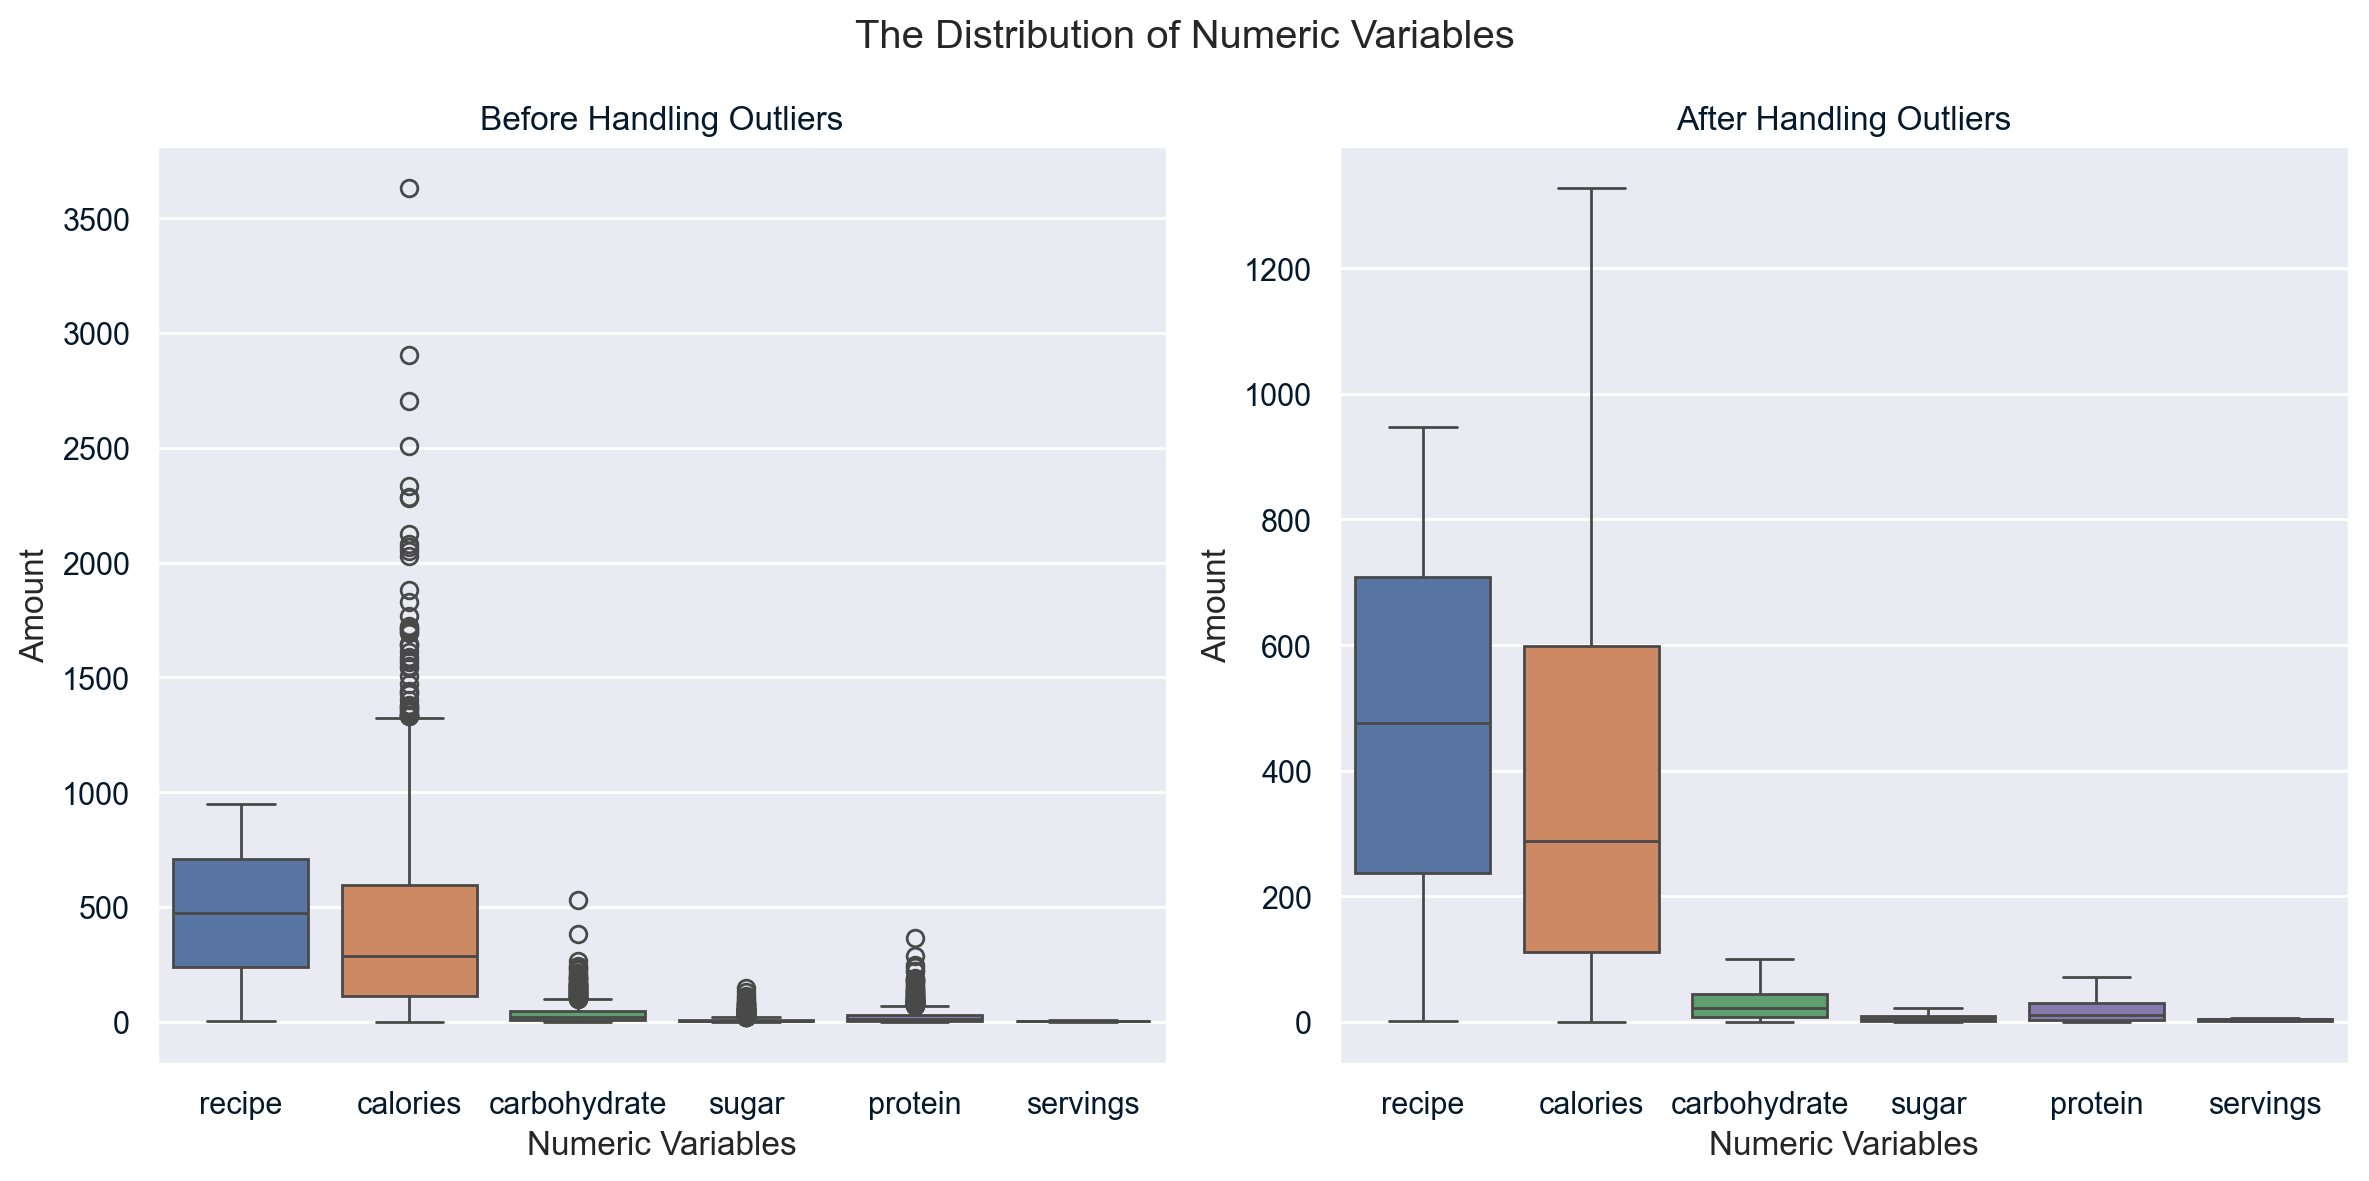

In [ ]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data_bef,ax=axes[0])
sns.boxplot(df,ax=axes[1])
axes[0].set_title("Before Handling Outliers")
axes[1].set_title("After Handling Outliers")
fig.suptitle("The Distribution of Numeric Variables")
axes[0].set_xlabel("Numeric Variables")
axes[1].set_xlabel("Numeric Variables")
axes[0].set_ylabel("Amount")
axes[1].set_ylabel("Amount")
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    float64
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    float64
 7   high_traffic  895 non-null    object 
dtypes: float64(6), object(2)
memory usage: 62.9+ KB


#  Exploratory Analysis:

In [ ]:
# create copy of df then remove recipe as not benefits
dfV2 = df.copy()
dfH  = df.copy()
dfH = dfH.drop(columns=['recipe'])
dfV2 = dfV2.drop(columns=['recipe'])

## A- Single Features Visulaisation

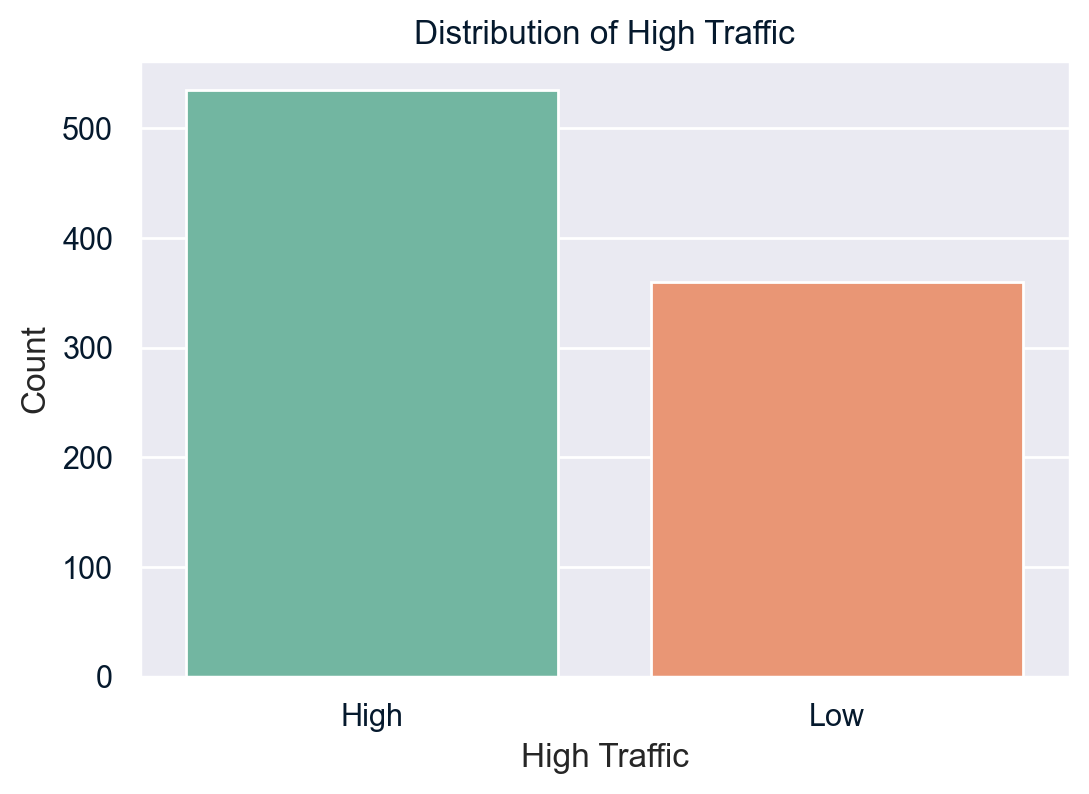

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dfV2, x='high_traffic', palette='Set2')

plt.xlabel('High Traffic')
plt.ylabel('Count')
plt.title('Distribution of High Traffic')

plt.show()

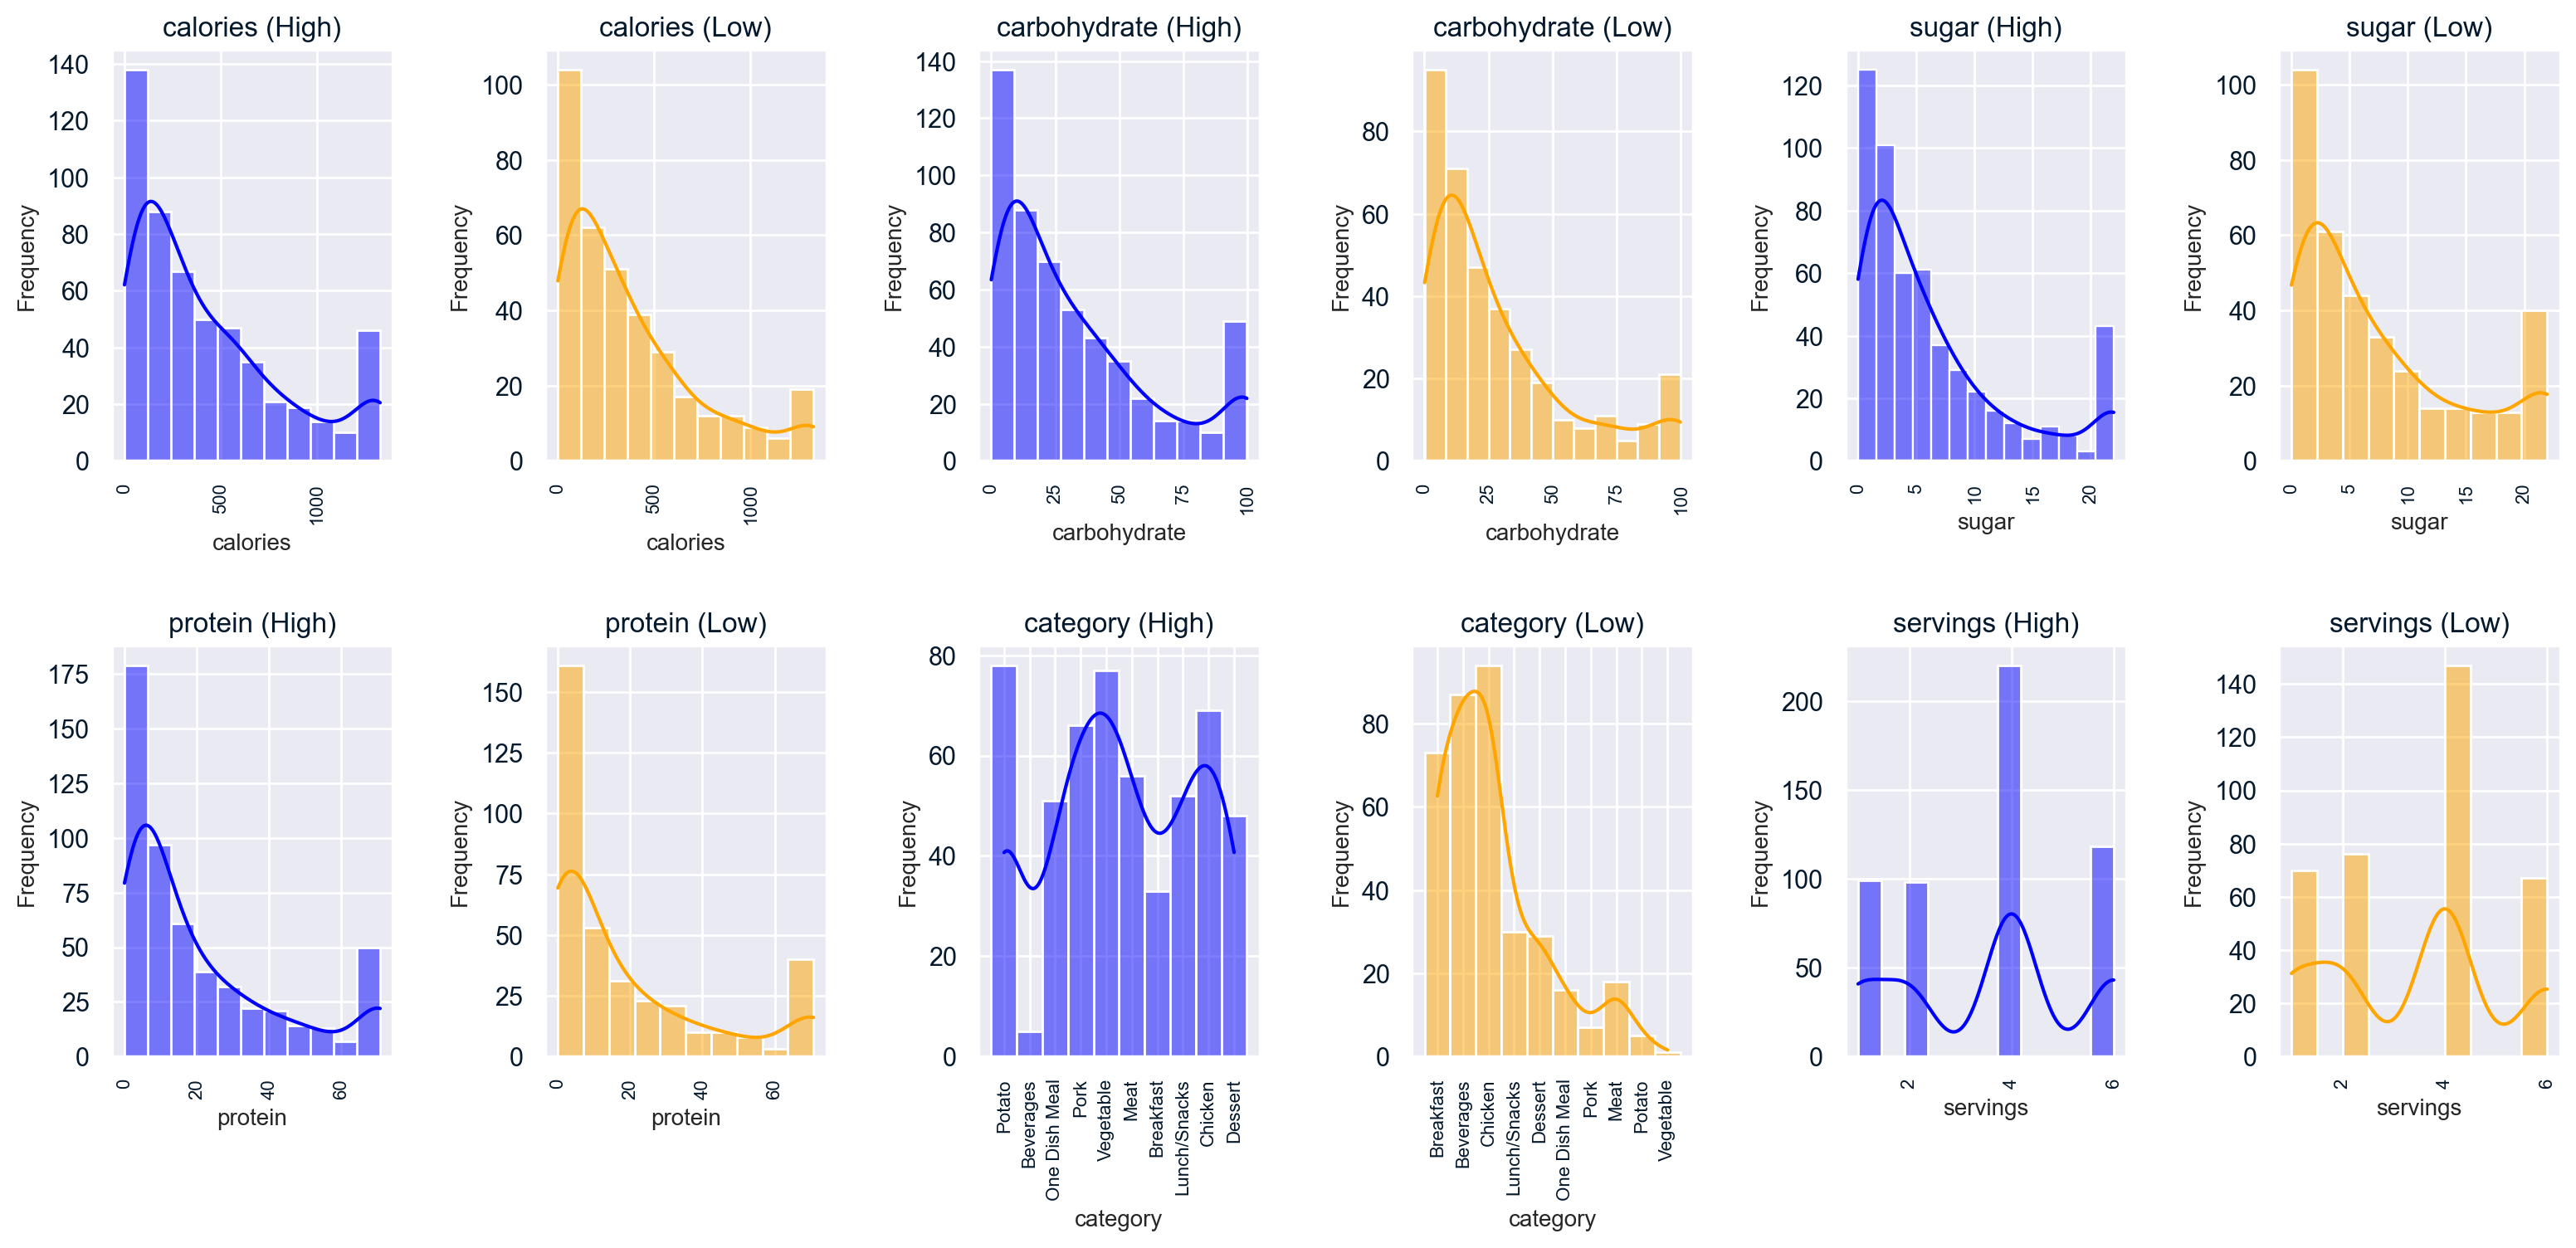

In [ ]:
# Define the grid dimensions
rows, cols = 2, 3  # Original grid size
cols *= 2  # Double the number of columns for side-by-side comparison

# Create the figure and axes
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 8))

# Extract columns excluding 'high_traffic'
col = [c for c in dfV2.columns if c != 'high_traffic']

# Filter data for "High" and "Low" traffic
dfVH = dfV2[dfV2['high_traffic'] == 'High']
dfVL = dfV2[dfV2['high_traffic'] == 'Low']

# Initialize the index for iterating through features
index = 0

# Loop through the grid
for i in range(rows):
    for j in range(0, cols, 2):  # Increment by 2 to handle side-by-side plots
        if index >= len(col):
            # Turn off unused subplots
            ax[i, j].axis("off")
            ax[i, j + 1].axis("off")
            continue

        # Plot "High" traffic histogram
        sns.histplot(dfVH[col[index]], ax=ax[i, j], kde=True, color='blue')
        ax[i, j].set_title(f"{col[index]} (High)", fontsize=12)
        ax[i, j].set_xlabel(col[index], fontsize=10)
        ax[i, j].set_ylabel('Frequency', fontsize=10)
        ax[i, j].tick_params(axis='x', rotation=90, labelsize=8)

        # Plot "Low" traffic histogram
        sns.histplot(dfVL[col[index]], ax=ax[i, j + 1], kde=True, color='orange')
        ax[i, j + 1].set_title(f"{col[index]} (Low)", fontsize=12)
        ax[i, j + 1].set_xlabel(col[index], fontsize=10)
        ax[i, j + 1].set_ylabel('Frequency', fontsize=10)
        ax[i, j + 1].tick_params(axis='x', rotation=90, labelsize=8)

        # Move to the next feature
        index += 1

# Adjust layout for better spacing
plt.tight_layout(pad=2.0)
plt.show()

## B- Two variables Heatmap corrlation Visulisation

#### encoding lables to use in heatmap as numeric

In [ ]:
# Encode categorical variables
dfV2 =  pd.get_dummies(dfV2, columns=['category'])

# Map 'high_traffic' values to binary encoding: 1 for "High", 0 for anything else
dfV2['high_traffic'] = dfV2['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)

columns_to_std = ['calories','carbohydrate', 'sugar', 'protein']

# Calculate standard deviation for the selected columns and add a new 'std' column
dfV2['std'] = dfV2[columns_to_std].apply(lambda row: np.std(row), axis=1)

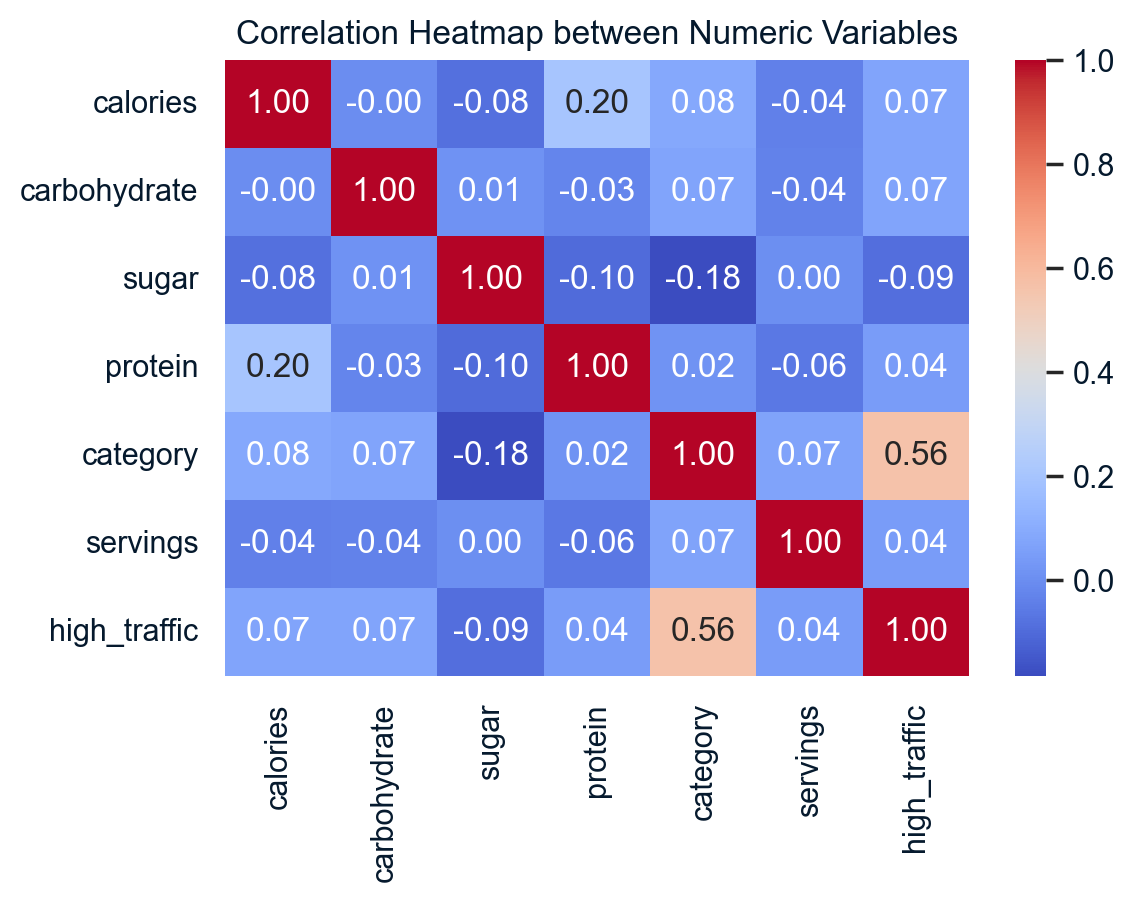

In [ ]:
# Encode categorical variables
labelencoder = LabelEncoder()
dfH['category'] = labelencoder.fit_transform(dfH['category'])
# Map 'high_traffic' values to binary encoding: 1 for "High", 0 for anything else
dfH['high_traffic'] = dfH['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)

# Select all numeric columns (including encoded ones)
numeric_df = dfH.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Numeric Variables')
plt.show()

In [ ]:
column_order = ['calories',  'carbohydrate',   'sugar',  'protein','std' , 'servings','category_Beverages'  ,'category_Breakfast' , 'category_Chicken',  'category_Dessert' , 'category_Lunch/Snacks' ,'category_Meat',  'category_One Dish Meal',  'category_Pork',  'category_Potato', 'category_Vegetable' ,'high_traffic']
data = dfV2[column_order]
data.head()

,calories,carbohydrate,sugar,protein,std,servings,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,high_traffic
1,35.48,38.56,0.660,0.92,18.147933,4.0,0,0,0,0,0,0,0,0,1,0,1
2,914.28,42.68,3.090,2.88,389.210353,1.0,0,1,0,0,0,0,0,0,0,0,0
3,97.03,30.56,21.965,0.02,36.187104,4.0,1,0,0,0,0,0,0,0,0,0,1
4,27.05,1.85,0.800,0.53,11.264798,4.0,1,0,0,0,0,0,0,0,0,0,0
5,691.15,3.46,1.650,53.93,291.511236,2.0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
# Drop the 'high_traffic' column to get feature columns
feature_cols = data.drop('high_traffic', axis=1).columns

# Features (X) and target (y)
X = data[feature_cols]  # Features
y = data['high_traffic']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Separate numeric and non-numeric features
numeric_features_train = X_train.iloc[:, :5]  # Numeric features in training set
non_numeric_features_train = X_train.iloc[:, 5:]  # Non-numeric features in training set

numeric_features_test = X_test.iloc[:, :5]  # Numeric features in testing set
non_numeric_features_test = X_test.iloc[:, 5:]  # Non-numeric features in testing set

# Initialize and fit the StandardScaler on the numeric features of the training set
st_scaler = StandardScaler()
st_scaler.fit(numeric_features_train)

# Transform numeric features for both training and testing sets
numeric_features_train_scaled = st_scaler.transform(numeric_features_train)
numeric_features_test_scaled = st_scaler.transform(numeric_features_test)

# Combine scaled numeric features with non-numeric features
X_train = np.concatenate((numeric_features_train_scaled, non_numeric_features_train), axis=1)
X_test= np.concatenate((numeric_features_test_scaled, non_numeric_features_test), axis=1)








# Model Development


### Fitting a baseline model ( Logistic Regression)


Accuracy:  0.8141263940520446
Precision:  0.8421052631578947
Recall:  0.8622754491017964
F1 Score:  0.8520710059171598
ROC AUC Score:  0.8618058001643771


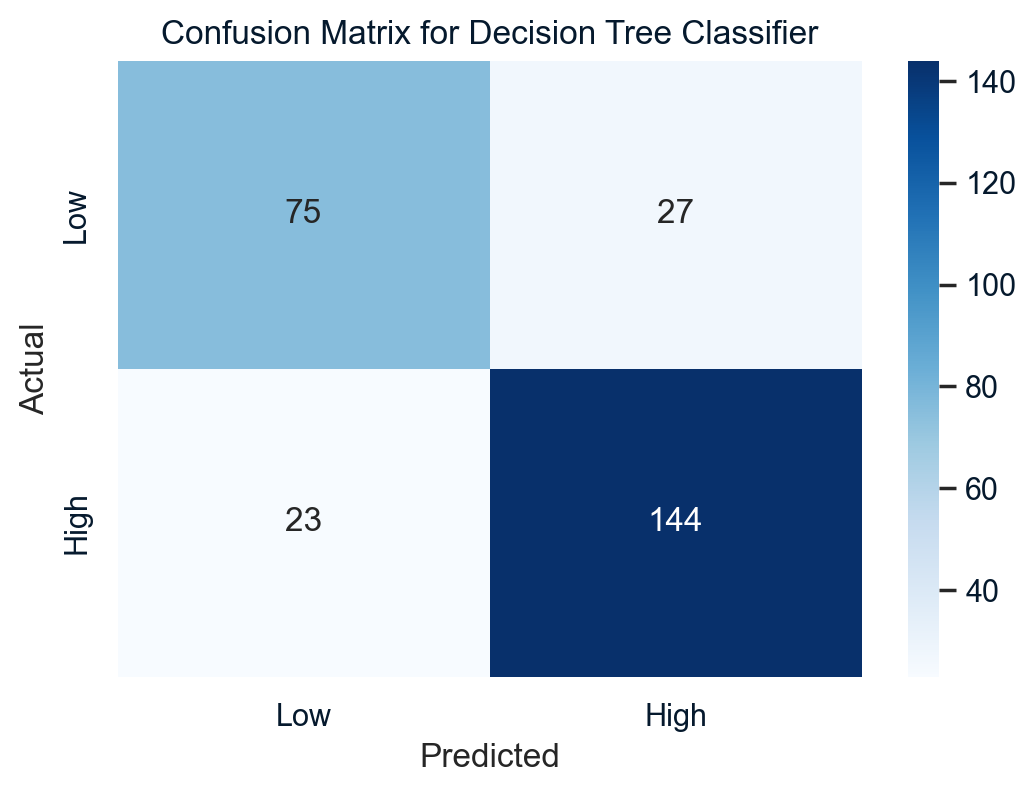

In [ ]:
# Initialize and train the Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=10)
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)  # Predicted class labels
y_pred_proba = lr.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Evaluate the model using classification metrics
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred_proba))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

## Fit tuning Logistic regression

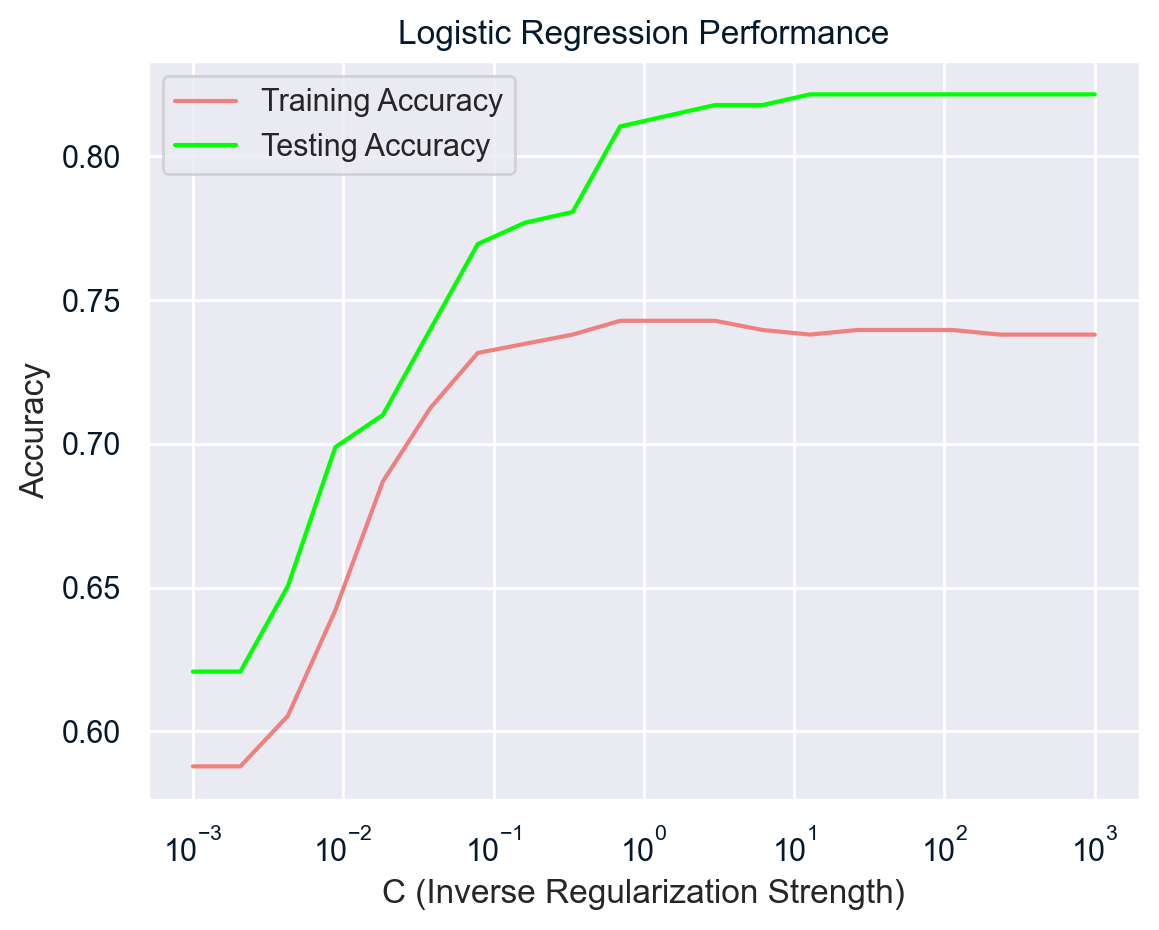

Best C value is: 12.743 
Testing Accuracy is: 0.822
Accuracy:  0.8215613382899628
Precision:  0.8562874251497006
Recall:  0.8562874251497006
F1 Score:  0.8562874251497006
ROC AUC Score:  0.8617470940471996


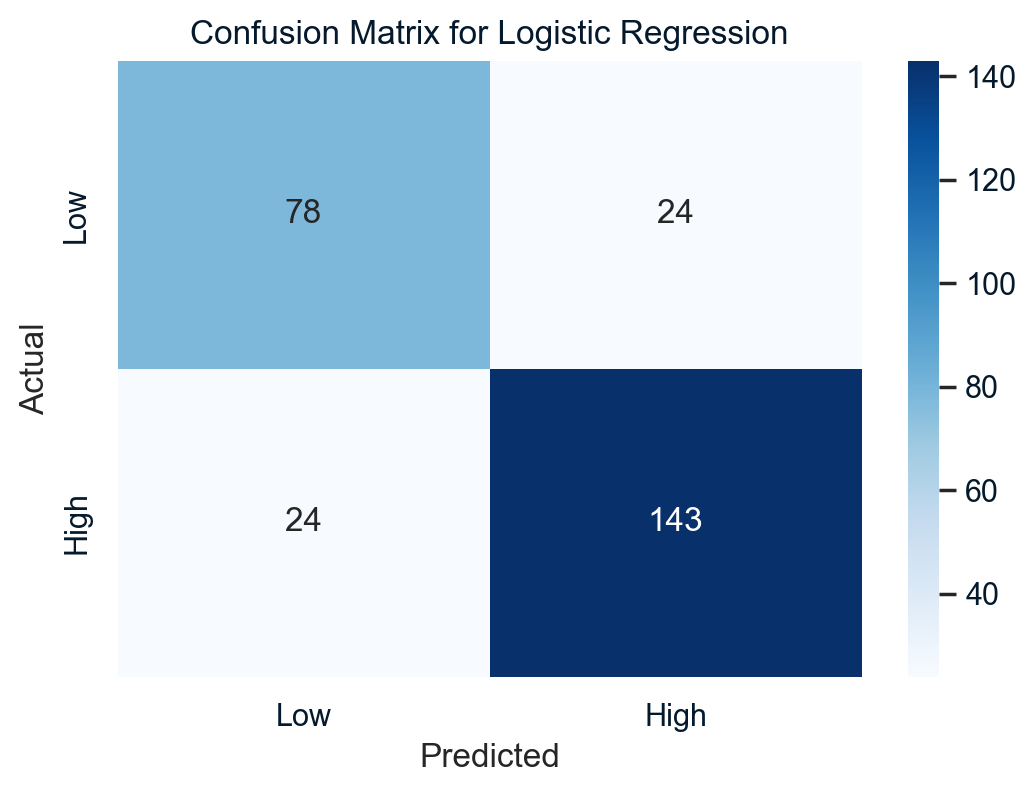

In [ ]:
# Lists to store scores
train_score = []
test_score = []
max_pair = (0, 0)

# Range of C values to test
C_values = np.logspace(-3, 3, 20)

for C in C_values:
    # Initialize and train the Logistic Regression model
    lr = LogisticRegression(C=C, max_iter=1000, random_state=10)
    lr.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)

    # Evaluate performance using accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store scores
    train_score.append(train_accuracy)
    test_score.append(test_accuracy)

    # Track the best C value based on testing accuracy
    test_pair = (C, test_accuracy)
    if test_pair[1] > max_pair[1]:
        max_pair = test_pair

# Plot the results
fig, ax = plt.subplots()
ax.plot(C_values, train_score, label="Training Accuracy", color='lightcoral')
ax.plot(C_values, test_score, label="Testing Accuracy", color='lime')
ax.set_xscale('log')  # Log scale for better visualization
ax.set_xlabel("C (Inverse Regularization Strength)")
ax.set_ylabel("Accuracy")
ax.set_title("Logistic Regression Performance")
ax.legend()
plt.show()

# Train the best model
best_lr = LogisticRegression(C=max_pair[0], max_iter=1000, random_state=10)
best_lr.fit(X_train, y_train)

# Make predictions on the test set
y_predlr = best_lr.predict(X_test)
y_pred_probalr = best_lr.predict_proba(X_test)[:, 1]

# Evaluate the model
print(f'Best C value is: {max_pair[0]:.3f} \nTesting Accuracy is: {max_pair[1]:.3f}')
print('Accuracy: ', accuracy_score(y_test, y_predlr))
print('Precision: ', precision_score(y_test, y_predlr))
print('Recall: ', recall_score(y_test, y_predlr))
print('F1 Score: ', f1_score(y_test, y_predlr))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred_probalr))

# Confusion Matrix
conf_matrixlr = confusion_matrix(y_test, y_predlr)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrixlr, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


## Decision Tree Regression Model


Accuracy:  0.724907063197026
Precision:  0.8163265306122449
Recall:  0.718562874251497
F1 Score:  0.7643312101910829


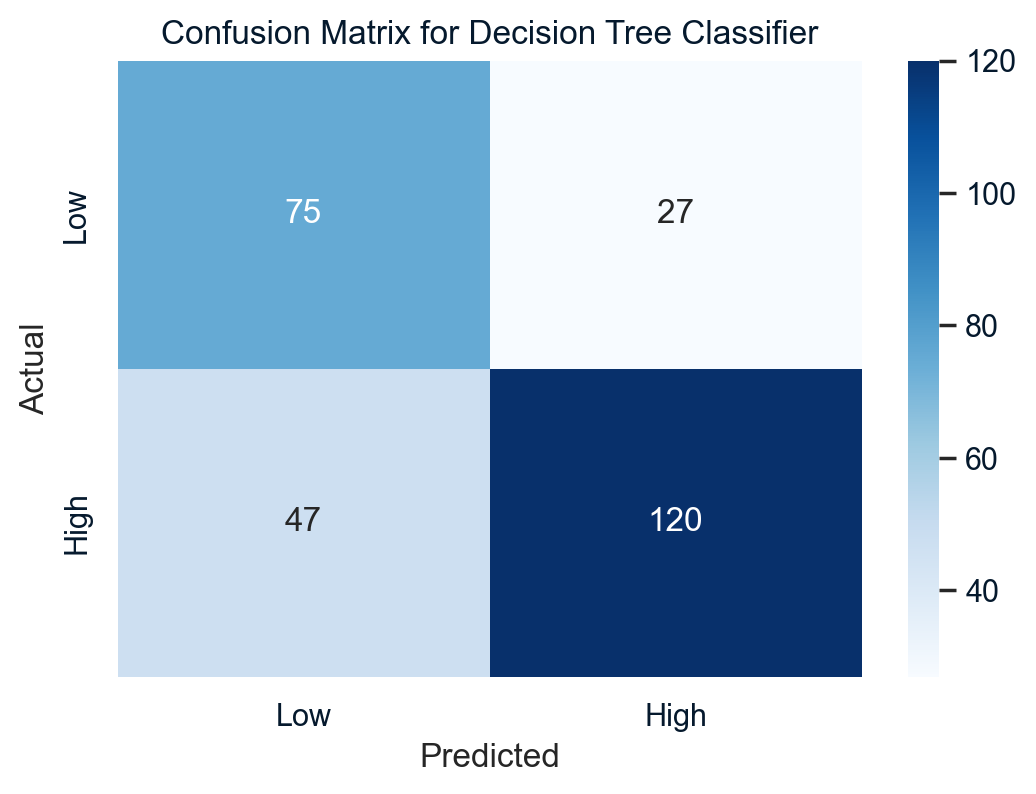

In [ ]:
tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_train,y_train)
y_pred2 = tree.predict(X_test)

# Evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred2))
print('Precision: ', precision_score(y_test, y_pred2))
print('Recall: ', recall_score(y_test, y_pred2))
print('F1 Score: ', f1_score(y_test, y_pred2))

conf_matrixdt = confusion_matrix(y_test, y_pred2)
# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrixdt, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

## Decision Tree Regression Tuning

Accuracy: 0.821561
Precision: 0.856287
Recall: 0.856287
F1 Score: 0.856287
ROC AUC Score: 0.810497


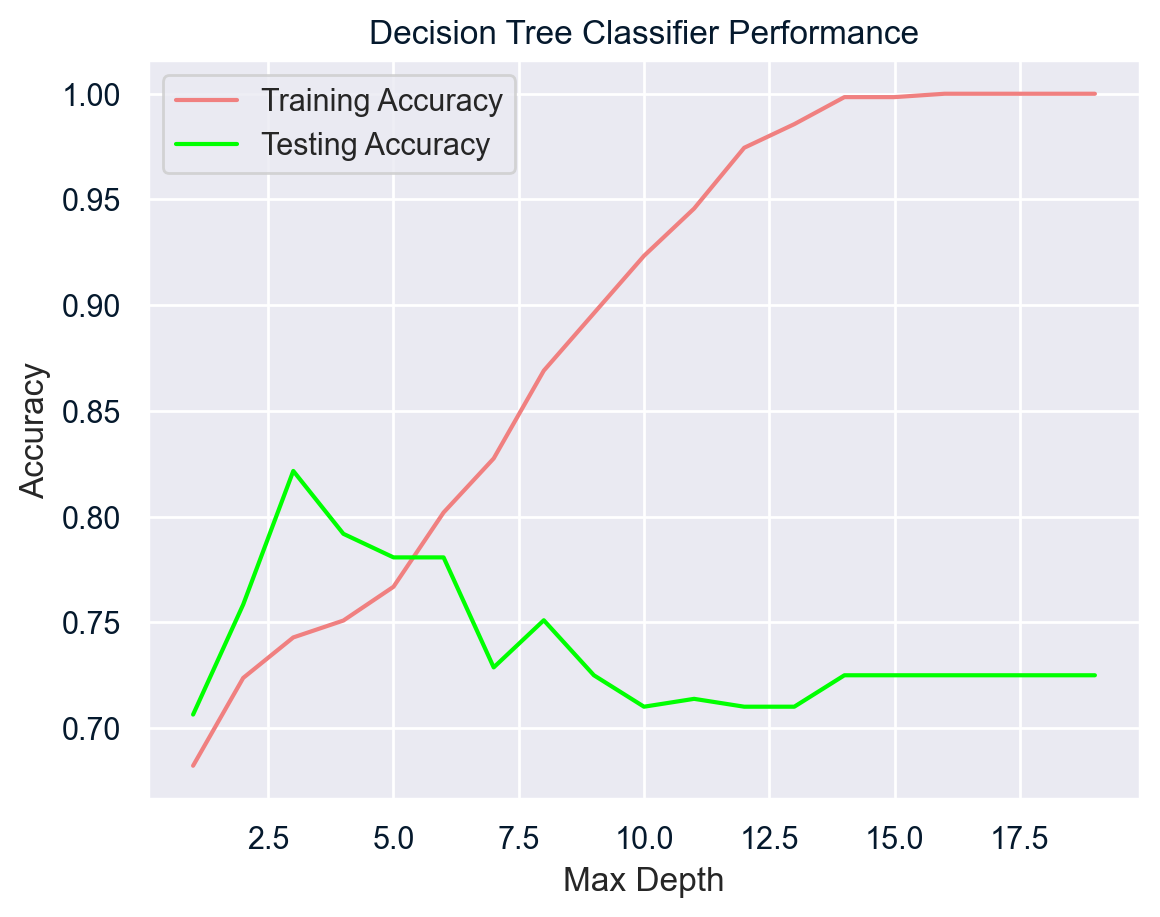

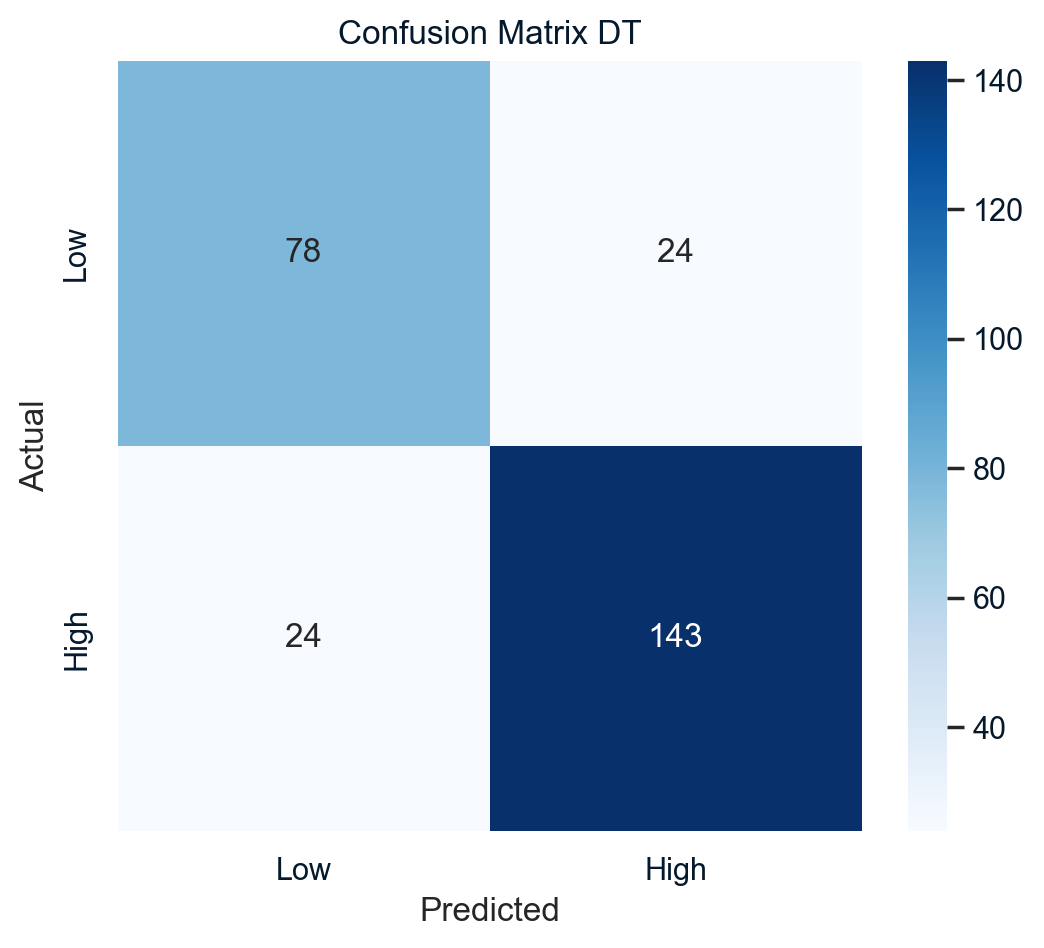

In [ ]:
train_scoret = []
test_scoret = []
max_score = 0
max_pair = (0, 0)

for i in range(1, 20):
    # Initialize and train the DecisionTreeClassifier
    treeh = DecisionTreeClassifier(max_depth=i, min_samples_split=2, random_state=10)
    treeh.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_predt = treeh.predict(X_train)
    y_test_predt = treeh.predict(X_test)

    # Evaluate performance using accuracy
    train_accuracyt = accuracy_score(y_train, y_train_predt)  # Training accuracy
    test_accuracyt = accuracy_score(y_test, y_test_predt)     # Testing accuracy

    # Store scores
    train_scoret.append(train_accuracyt)
    test_scoret.append(test_accuracyt)

    # Track the best max_depth based on testing accuracy
    test_pair = (i, test_accuracyt)
    if test_pair[1] > max_pair[1]:
        max_pair = test_pair

# Plot the results
fig, ax = plt.subplots()
ax.plot(range(1, 20), train_scoret, label="Training Accuracy", color='lightcoral')
ax.plot(range(1, 20), test_scoret, label="Testing Accuracy", color='lime')
ax.set_xlabel("Max Depth")
ax.set_ylabel("Accuracy")
ax.set_title("Decision Tree Classifier Performance")
ax.legend()

# Identify the best max_depth
best_max_depth = max_pair[0]

# Retrain the model with the best max_depth
best_treedt = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=2, random_state=10)
best_treedt.fit(X_train, y_train)

# Predict on the test set using the best model
y_test_pred_bestdt = best_treedt.predict(X_test)

# Calculate the metrics using the best model
accuracy = accuracy_score(y_test, y_test_pred_bestdt)
precision = precision_score(y_test, y_test_pred_bestdt)
recall = recall_score(y_test, y_test_pred_bestdt)
f1 = f1_score(y_test, y_test_pred_bestdt)
roc_auc = roc_auc_score(y_test, y_test_pred_bestdt)

# Print all metrics
print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")
print(f"ROC AUC Score: {roc_auc:.6f}")

# Compute the confusion matrix
cmtdt = confusion_matrix(y_test, y_test_pred_bestdt)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cmtdt, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix DT')
plt.show()

## Support Vactor Classification Model

Accuracy: 0.762
Confusion Matrix:
[[ 60  42]
 [ 22 145]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       102
           1       0.78      0.87      0.82       167

    accuracy                           0.76       269
   macro avg       0.75      0.73      0.74       269
weighted avg       0.76      0.76      0.76       269



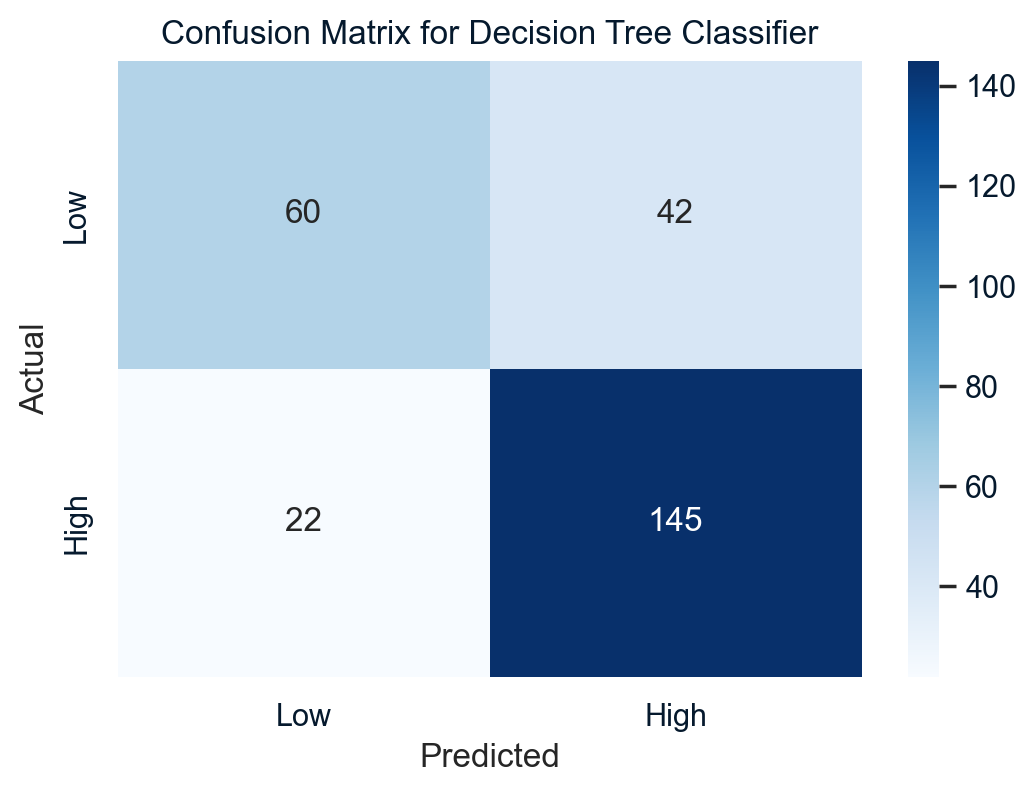

In [ ]:
# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=10)
svm_model.fit(X_train, y_train)
# Predict on the test set
y_pred = svm_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

## Support Vactor Classification Tuning

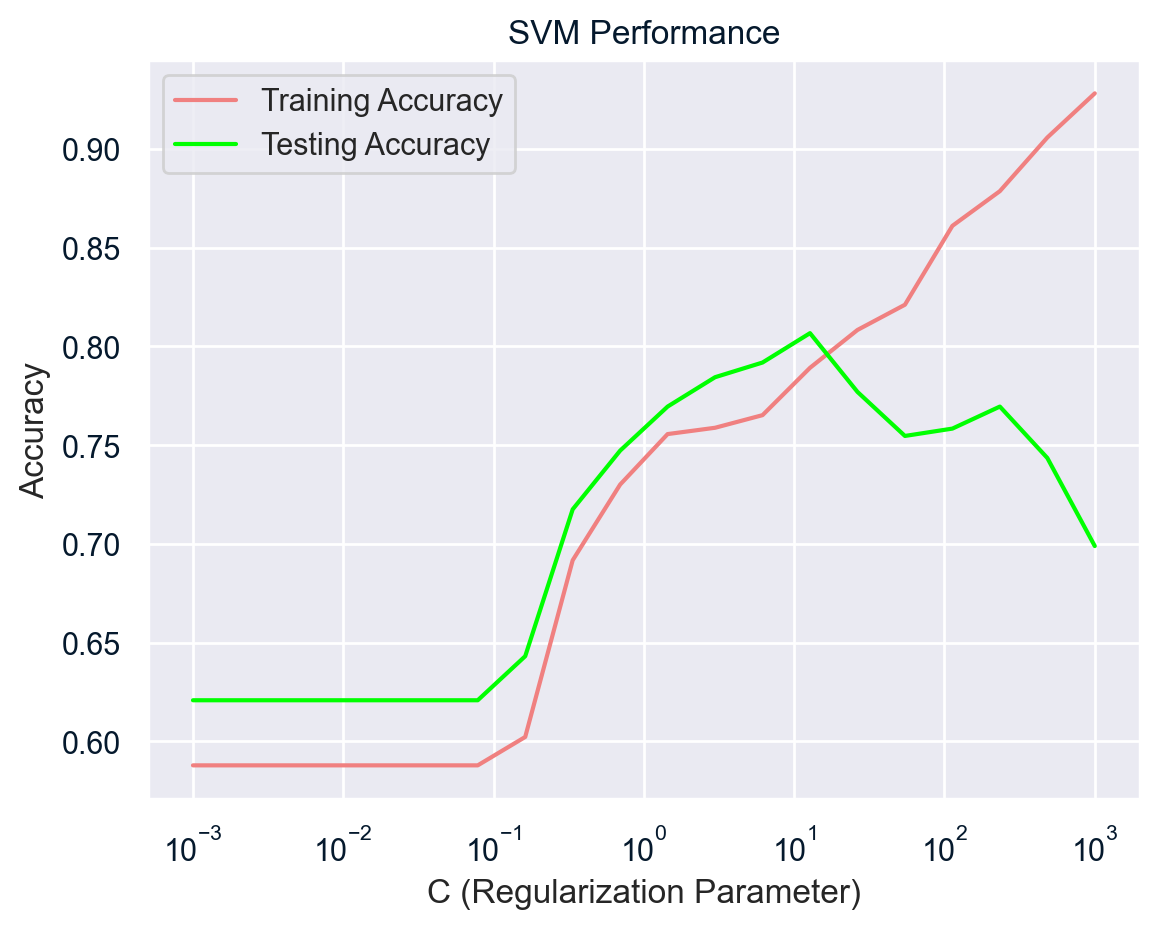

Best C value is: 12.743 
Testing Accuracy is: 0.807
Accuracy:  0.8066914498141264
Precision:  0.8285714285714286
Recall:  0.8682634730538922
F1 Score:  0.847953216374269
ROC AUC Score:  0.7870729129975342


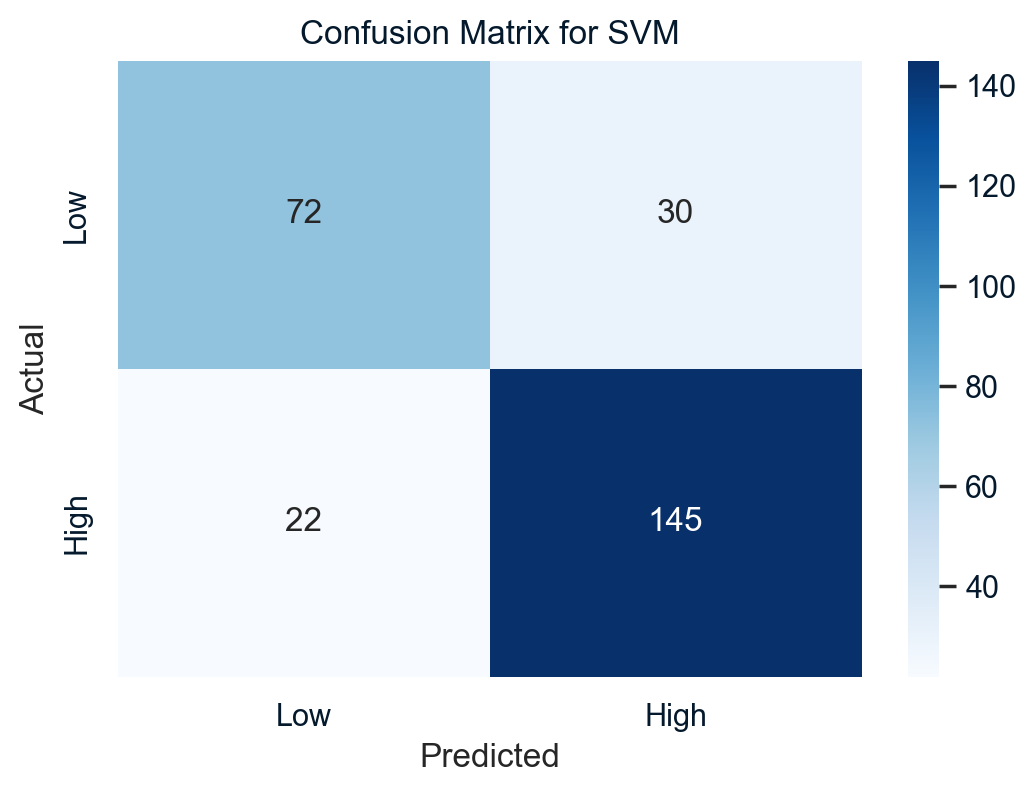

In [ ]:
# Lists to store scores
train_score = []
test_score = []
max_pair = (0, 0)

# Range of C values to test
C_values = np.logspace(-3, 3, 20)

for C in C_values:
    # Initialize and train the SVM model
    svm_model = SVC(kernel='rbf', C=C, gamma='scale', random_state=10)
    svm_model.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_pred = svm_model.predict(X_train)
    y_test_pred = svm_model.predict(X_test)

    # Evaluate performance using accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store scores
    train_score.append(train_accuracy)
    test_score.append(test_accuracy)

    # Track the best C value based on testing accuracy
    test_pair = (C, test_accuracy)
    if test_pair[1] > max_pair[1]:
        max_pair = test_pair

# Plot the results
fig, ax = plt.subplots()
ax.plot(C_values, train_score, label="Training Accuracy", color='lightcoral')
ax.plot(C_values, test_score, label="Testing Accuracy", color='lime')
ax.set_xscale('log')  # Log scale for better visualization
ax.set_xlabel("C (Regularization Parameter)")
ax.set_ylabel("Accuracy")
ax.set_title("SVM Performance")
ax.legend()
plt.show()

# Train the best model
best_svm = SVC(kernel='rbf', C=max_pair[0], gamma='scale', random_state=10)
best_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_svm.predict(X_test)

# Evaluate the model
print(f'Best C value is: {max_pair[0]:.3f} \nTesting Accuracy is: {max_pair[1]:.3f}')
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM")
plt.show()